# Embedding distances and comparison

Once embeddings where extracted we are going to calculate distances between audio examples and hear the nearest neigbors acoording to each model.

In [3]:
import pandas as pd
import numpy as np
import os
import soundfile as sf
from IPython.display import Audio, display
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
audio_path = cwd + '/TrainDataLatest_PodCastAllRounds_123567910/wav/'

def load_audio(df_metadata,idx):
    audio_event = df_metadata.iloc[idx]
    audio_file = audio_event['wav_filename']
    x,fs = sf.read(os.path.join(audio_path,audio_file))
    start_sample = int(np.floor(audio_event['start_time_s']*fs))
    end_sample = start_sample + int(np.ceil(audio_event['duration_s']*fs)) 
    waveform = x[start_sample:end_sample]
    return waveform,fs

def load_dataframes(embedding_file,metadata_file):
    df_embedding = pd.read_csv(embedding_file,sep='\t',header=None)
    df_embedding.dropna(axis=1,inplace=True)
    df_metadata = pd.read_csv(metadata_file,sep='\t')
    df_metadata.dropna(axis=1,inplace=True)
    return df_embedding, df_metadata



## Vggish example

In [6]:
df_embedding, df_metadata = load_dataframes('embeddings_vggish.tsv','metadata_vggish.tsv')

In [23]:
# Work with orcasound lab data and get a random example
random_example = df_metadata[df_metadata['location'] == 'orcasound_lab'].sample(1)


## good idx example 3370
random_example = df_metadata.loc[3370]
#random_example

dataset                     wav_filename  start_time_s  \
3539  podcast_round3  OS_9_27_2017_10_01_00__0000.wav     21.006836   

      duration_s       location                 date  \
3539    4.067383  orcasound_lab  2017-01-01 00:00:00   

     pst_or_master_tape_identifier  year  month  
3539                      10:01:00  2017      1

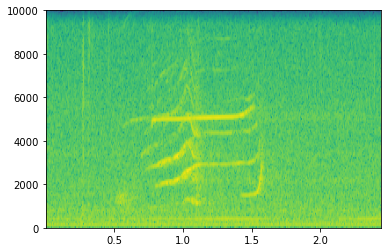

In [24]:
# hear example 

#rnd_idx = random_example.index[0]
rnd_idx = 3370
x, fs = load_audio(df_metadata,rnd_idx)
plt.specgram(x,Fs=fs)
Audio(data=x,rate=fs)

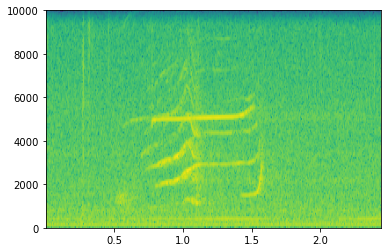

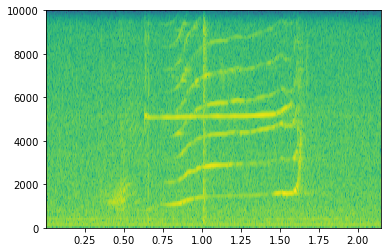

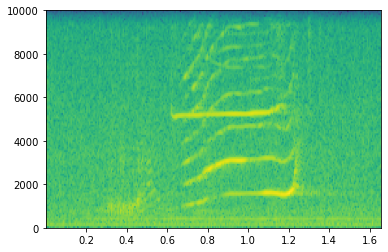

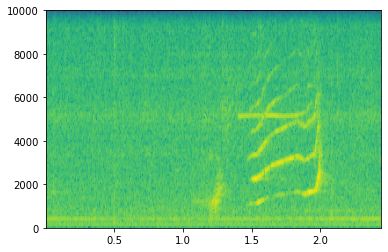

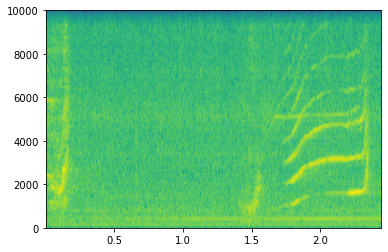

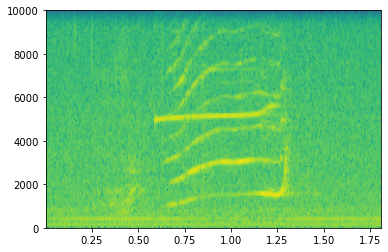

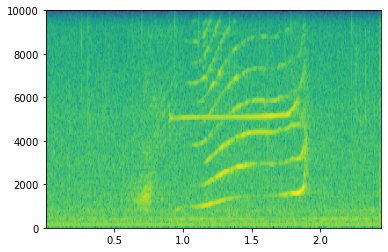

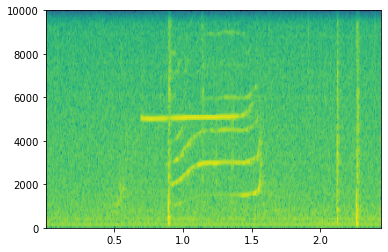

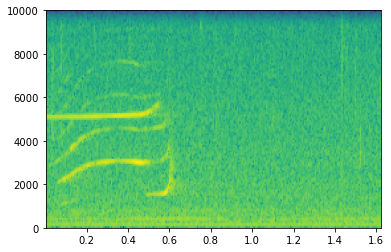

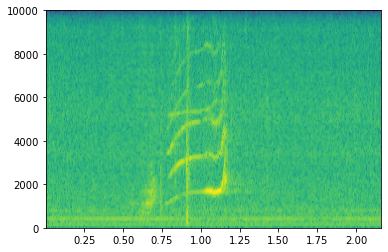

In [25]:

embedding_example = df_embedding.iloc[rnd_idx].values
all_embeddings = df_embedding.values

# compute distance of the example wrt to all the dataset
distances = np.linalg.norm(embedding_example-all_embeddings,axis=1)
# get top 10 similar ones
sorted_idx = np.argsort(distances)[:10]

# load 10 similar audios
for idx in sorted_idx:
    x, fs = load_audio(df_metadata,idx)
    plt.specgram(x,Fs=fs)
    plt.show()
    display(Audio(data=x,rate=fs))

## Yamnet

In [30]:

df_embedding, df_metadata = load_dataframes('embeddings_yamnet.tsv','metadata_yamnet.tsv')

# Work with orcasound lab data and get a random example
random_example = df_metadata[df_metadata['location'] == 'orcasound_lab'].sample(1)
random_example

random_example = df_metadata.loc[3370]

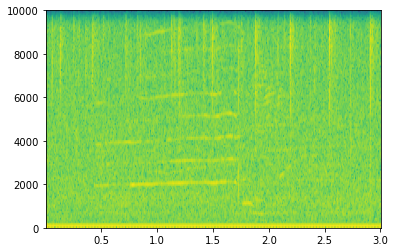

In [31]:
# hear example 

#rnd_idx = random_example.index[0]
rnd_idx = 3370
x, fs = load_audio(df_metadata,rnd_idx)
plt.specgram(x,Fs=fs)
Audio(data=x,rate=fs)

In [32]:

embedding_example = df_embedding.iloc[rnd_idx].values
all_embeddings = df_embedding.values

# compute distance of the example wrt to all the dataset
distances = np.linalg.norm(embedding_example-all_embeddings,axis=1)
# get top 10 similar ones
sorted_idx = np.argsort(distances)[:10]

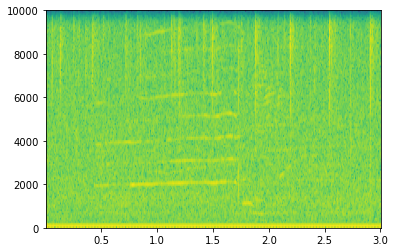

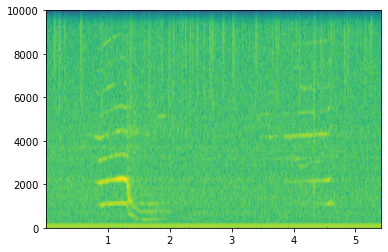

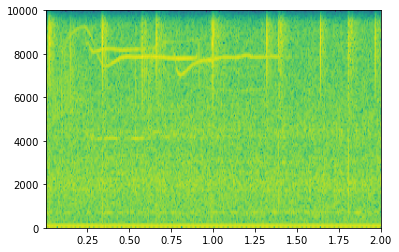

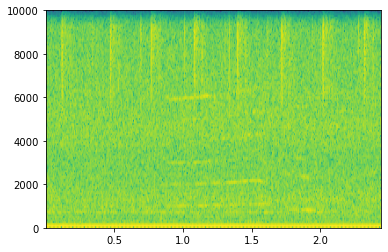

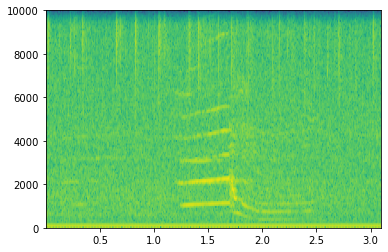

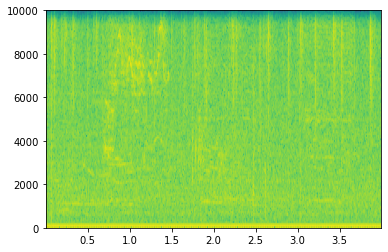

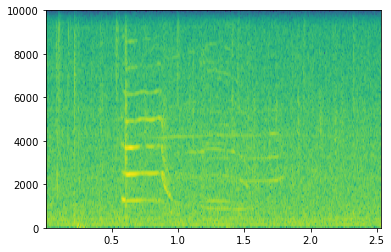

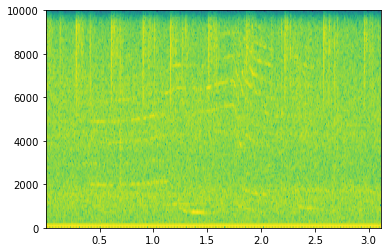

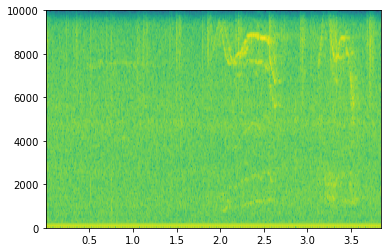

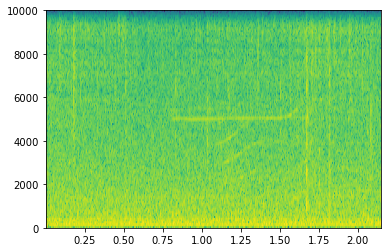

In [33]:
# load 10 similar audios
for idx in sorted_idx:
    x, fs = load_audio(df_metadata,idx)
    plt.specgram(x,Fs=fs)
    plt.show()
    display(Audio(data=x,rate=fs))

## 